In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/Users/elisapashku/Desktop/Pisa/DMProject/Dataunderstanding.csv", skipinitialspace=True, sep=',')
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition_numerical
0,0,52.0,No,Travel_Rarely,Research & Development,9,4,Medical,2,Male,...,No,17,3.0,3,0,2.0,2,8.0,7,0
1,1,36.0,No,Travel_Rarely,Research & Development,1,1,Life Sciences,2,Male,...,Yes,14,3.0,3,1,3.0,3,1.0,8,0
2,2,60.0,No,Travel_Frequently,Sales,16,3,Life Sciences,3,Male,...,Yes,25,3.0,3,1,4.0,3,1.0,5,0
3,3,33.0,No,Travel_Rarely,Research & Development,5,4,Technical Degree,2,Male,...,No,14,3.0,2,0,1.0,3,3.0,7,0
4,4,31.0,No,Travel_Rarely,Research & Development,9,2,Life Sciences,3,Female,...,No,12,3.0,3,0,3.0,3,10.0,2,0


In [4]:
del (df['Unnamed: 0'])
del (df['Attrition_numerical'])

In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,52.0,No,Travel_Rarely,Research & Development,9,4,Medical,2,Male,3,...,9,No,17,3.0,3,0,2.0,2,8.0,7
1,36.0,No,Travel_Rarely,Research & Development,1,1,Life Sciences,2,Male,3,...,1,Yes,14,3.0,3,1,3.0,3,1.0,8
2,60.0,No,Travel_Frequently,Sales,16,3,Life Sciences,3,Male,3,...,1,Yes,25,3.0,3,1,4.0,3,1.0,5
3,33.0,No,Travel_Rarely,Research & Development,5,4,Technical Degree,2,Male,3,...,2,No,14,3.0,2,0,1.0,3,3.0,7
4,31.0,No,Travel_Rarely,Research & Development,9,2,Life Sciences,3,Female,3,...,1,No,12,3.0,3,0,3.0,3,10.0,2


In [6]:
df['Age_Range'] = pd.qcut(df['Age'], q=4, labels=['<=30', '>30 <=36', '>36 <=43', '>43'])
df[[ 'Age', 'Age_Range']].head()

,Age,Age_Range
0,52.0,>43
1,36.0,>30 <=36
2,60.0,>43
3,33.0,>30 <=36
4,31.0,>30 <=36


In [7]:
df['Income_bin'] = pd.cut(df['MonthlyIncome'].astype(int), 4, right=False)
df[['MonthlyIncome', 'Income_bin']].head()

,MonthlyIncome,Income_bin
0,8446.0,"[5756.5, 10504.0)"
1,4834.0,"[1009.0, 5756.5)"
2,4768.0,"[1009.0, 5756.5)"
3,2799.0,"[1009.0, 5756.5)"
4,7978.0,"[5756.5, 10504.0)"


In [8]:
df['Distance_bin'] = pd.cut(df['DistanceFromHome'].astype(int), 4, right=False)
df[['DistanceFromHome', 'Distance_bin']].head()

,DistanceFromHome,Distance_bin
0,9,"[8.0, 15.0)"
1,1,"[1.0, 8.0)"
2,16,"[15.0, 22.0)"
3,5,"[1.0, 8.0)"
4,9,"[8.0, 15.0)"


In [9]:
df['PercentSalaryHike_bin'] = pd.cut(df['PercentSalaryHike'].astype(int), 4, right=False)
df[['PercentSalaryHike', 'PercentSalaryHike_bin']].head()

,PercentSalaryHike,PercentSalaryHike_bin
0,17,"[14.5, 18.0)"
1,14,"[11.0, 14.5)"
2,25,"[21.5, 25.014)"
3,14,"[11.0, 14.5)"
4,12,"[11.0, 14.5)"


In [10]:
del (df['Age'])
del (df['MonthlyIncome'])
del (df['DistanceFromHome'])
del (df['PercentSalaryHike'])


In [11]:
(df['Department'].unique())

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [12]:
values_Dep= ['Research & Development', 'Sales', 'Human Resources']


for i in values_Dep:
    print(i, '\n' ,df[df['Department'] == i]['JobRole'].unique())
    
    

Research & Development 
 ['Research Director' 'Manager' 'Research Scientist'
 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative']
Sales 
 ['Sales Executive' 'Sales Representative' 'Manager']
Human Resources 
 ['Human Resources' 'Manager']


In [13]:
del df['JobRole']


In [14]:
df['RelSatisfaction'] = 'RelSat:' + df['RelationshipSatisfaction'].map({1: 'Low', 2: 'Medium',
                                                            3:'High', 4: 'VeryHigh'}).astype(str) 

df['Edu'] = 'Edu:' + df['Education'].map( {1 :'Below College', 2 :'College',
                                  3 :'Bachelor', 4 :'Master', 5 :'Doctor'}).astype(str) 

df['EnvSatisfaction'] = 'EnvSat:' + df['EnvironmentSatisfaction'].map({1: 'Low', 2: 'Medium',
                                                            3:'High', 4: 'VeryHigh'}).astype(str) 

df['JobInv'] = 'JobInv:' + df['JobInvolvement'].map({1: 'Low', 2: 'Medium',
                                         3:'High', 4: 'VeryHigh'}).astype(str) 

df['JobSatisfaction'] = 'JobSat:' + df['JobSatisfaction'].map({1: 'Low', 2: 'Medium',
                                                   3:'High', 4: 'VeryHigh'}).astype(str)  

df['PerformanceRating'] = 'PRat:' + df['PerformanceRating'].map({1: 'Low', 2: 'Good',
                                                       3:'Excellent', 4: 'Outstanding'}).astype(str) 


df['WorkLifeBalance'] = 'WLB:' + df['WorkLifeBalance'].map({1: 'Bad', 2: 'Good',
                                                   3:'Better', 4: 'Best'}).astype(str)  


df.drop(['RelationshipSatisfaction', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement'], axis=1, inplace=True)
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobLevel,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,...,YearsAtCompany,YearsInCurrentRole,Age_Range,Income_bin,Distance_bin,PercentSalaryHike_bin,RelSatisfaction,Edu,EnvSatisfaction,JobInv
0,No,Travel_Rarely,Research & Development,Medical,Male,3,JobSat:High,Single,9,No,...,8.0,7,>43,"[5756.5, 10504.0)","[8.0, 15.0)","[14.5, 18.0)",RelSat:High,Edu:Master,EnvSat:Medium,JobInv:High
1,No,Travel_Rarely,Research & Development,Life Sciences,Male,5,JobSat:High,Divorced,1,Yes,...,1.0,8,>30 <=36,"[1009.0, 5756.5)","[1.0, 8.0)","[11.0, 14.5)",RelSat:High,Edu:Below College,EnvSat:Medium,JobInv:High
2,No,Travel_Frequently,Sales,Life Sciences,Male,2,JobSat:VeryHigh,Divorced,1,Yes,...,1.0,5,>43,"[1009.0, 5756.5)","[15.0, 22.0)","[21.5, 25.014)",RelSat:High,Edu:Bachelor,EnvSat:High,JobInv:High
3,No,Travel_Rarely,Research & Development,Technical Degree,Male,1,JobSat:Medium,Single,2,No,...,3.0,7,>30 <=36,"[1009.0, 5756.5)","[1.0, 8.0)","[11.0, 14.5)",RelSat:Medium,Edu:Master,EnvSat:Medium,JobInv:High
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,1,JobSat:VeryHigh,Single,1,No,...,10.0,2,>30 <=36,"[5756.5, 10504.0)","[8.0, 15.0)","[11.0, 14.5)",RelSat:High,Edu:College,EnvSat:High,JobInv:High


In [15]:
df['JobLevel'] = 'JobLevel: ' + df['JobLevel'].astype(str) 
df['NCompWorked'] = 'Companies:' + df['NumCompaniesWorked'].astype(str) 
df['YearsAtCompany'] = 'CompYears:' + df['YearsAtCompany'].astype(str)  
df['YearsInCurrRole'] = 'RoleYears:' + df['YearsInCurrentRole'].astype(str) 
df['Age_Range'] = 'Years:' + df['Age_Range'].astype(str) 
df['Income_bin'] = df['Income_bin'].astype(str) + '_USD'
df['Distance_bin'] = df['Distance_bin'].astype(str) + '_km'
df['PercentSalaryHike_bin'] = df['PercentSalaryHike_bin'].astype(str) + '_%'
df['StockLevel'] = 'StockOpt:' + df['StockOptionLevel'].astype(str) 
df['TrainingTimesLastYear'] = 'Training time:' + df['TrainingTimesLastYear'].astype(str) 
df['OverTime'] = 'OverTime:' + df['OverTime'].astype(str)  
df['YearsAtCompany'] = 'YearsAtCo:' + df['YearsAtCompany'].astype(str)


df.drop(['YearsInCurrentRole', 'NumCompaniesWorked', 'StockOptionLevel'], axis=1, inplace=True)
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobLevel,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,...,Income_bin,Distance_bin,PercentSalaryHike_bin,RelSatisfaction,Edu,EnvSatisfaction,JobInv,NCompWorked,YearsInCurrRole,StockLevel
0,No,Travel_Rarely,Research & Development,Medical,Male,JobLevel: 3,JobSat:High,Single,OverTime:No,PRat:Excellent,...,"[5756.5, 10504.0)_USD","[8.0, 15.0)_km","[14.5, 18.0)_%",RelSat:High,Edu:Master,EnvSat:Medium,JobInv:High,Companies:9,RoleYears:7,StockOpt:0
1,No,Travel_Rarely,Research & Development,Life Sciences,Male,JobLevel: 5,JobSat:High,Divorced,OverTime:Yes,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:Below College,EnvSat:Medium,JobInv:High,Companies:1,RoleYears:8,StockOpt:1
2,No,Travel_Frequently,Sales,Life Sciences,Male,JobLevel: 2,JobSat:VeryHigh,Divorced,OverTime:Yes,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[15.0, 22.0)_km","[21.5, 25.014)_%",RelSat:High,Edu:Bachelor,EnvSat:High,JobInv:High,Companies:1,RoleYears:5,StockOpt:1
3,No,Travel_Rarely,Research & Development,Technical Degree,Male,JobLevel: 1,JobSat:Medium,Single,OverTime:No,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:Medium,Edu:Master,EnvSat:Medium,JobInv:High,Companies:2,RoleYears:7,StockOpt:0
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,JobLevel: 1,JobSat:VeryHigh,Single,OverTime:No,PRat:Excellent,...,"[5756.5, 10504.0)_USD","[8.0, 15.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:College,EnvSat:High,JobInv:High,Companies:1,RoleYears:2,StockOpt:0


In [16]:
df.dtypes

Attrition                object
BusinessTravel           object
Department               object
EducationField           object
Gender                   object
JobLevel                 object
JobSatisfaction          object
MaritalStatus            object
OverTime                 object
PerformanceRating        object
TrainingTimesLastYear    object
WorkLifeBalance          object
YearsAtCompany           object
Age_Range                object
Income_bin               object
Distance_bin             object
PercentSalaryHike_bin    object
RelSatisfaction          object
Edu                      object
EnvSatisfaction          object
JobInv                   object
NCompWorked              object
YearsInCurrRole          object
StockLevel               object
dtype: object

In [17]:
dt = df.apply(list)
dt.head(100)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobLevel,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,...,Income_bin,Distance_bin,PercentSalaryHike_bin,RelSatisfaction,Edu,EnvSatisfaction,JobInv,NCompWorked,YearsInCurrRole,StockLevel
0,No,Travel_Rarely,Research & Development,Medical,Male,JobLevel: 3,JobSat:High,Single,OverTime:No,PRat:Excellent,...,"[5756.5, 10504.0)_USD","[8.0, 15.0)_km","[14.5, 18.0)_%",RelSat:High,Edu:Master,EnvSat:Medium,JobInv:High,Companies:9,RoleYears:7,StockOpt:0
1,No,Travel_Rarely,Research & Development,Life Sciences,Male,JobLevel: 5,JobSat:High,Divorced,OverTime:Yes,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:Below College,EnvSat:Medium,JobInv:High,Companies:1,RoleYears:8,StockOpt:1
2,No,Travel_Frequently,Sales,Life Sciences,Male,JobLevel: 2,JobSat:VeryHigh,Divorced,OverTime:Yes,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[15.0, 22.0)_km","[21.5, 25.014)_%",RelSat:High,Edu:Bachelor,EnvSat:High,JobInv:High,Companies:1,RoleYears:5,StockOpt:1
3,No,Travel_Rarely,Research & Development,Technical Degree,Male,JobLevel: 1,JobSat:Medium,Single,OverTime:No,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:Medium,Edu:Master,EnvSat:Medium,JobInv:High,Companies:2,RoleYears:7,StockOpt:0
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,JobLevel: 1,JobSat:VeryHigh,Single,OverTime:No,PRat:Excellent,...,"[5756.5, 10504.0)_USD","[8.0, 15.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:College,EnvSat:High,JobInv:High,Companies:1,RoleYears:2,StockOpt:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No,Travel_Frequently,Research & Development,Life Sciences,Male,JobLevel: 1,JobSat:VeryHigh,Single,OverTime:No,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[8.0, 15.0)_km","[18.0, 21.5)_%",RelSat:VeryHigh,Edu:College,EnvSat:VeryHigh,JobInv:High,Companies:1,RoleYears:3,StockOpt:0
96,No,Travel_Rarely,Sales,Life Sciences,Male,JobLevel: 2,JobSat:High,Married,OverTime:No,PRat:Outstanding,...,"[1009.0, 5756.5)_USD","[15.0, 22.0)_km","[11.0, 14.5)_%",RelSat:Medium,Edu:Below College,EnvSat:Low,JobInv:VeryHigh,Companies:2,RoleYears:2,StockOpt:0
97,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,JobLevel: 5,JobSat:Medium,Single,OverTime:Yes,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:VeryHigh,Edu:Master,EnvSat:VeryHigh,JobInv:High,Companies:7,RoleYears:15,StockOpt:0
98,No,Non-Travel,Sales,Medical,Male,JobLevel: 3,JobSat:Medium,Divorced,OverTime:No,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[8.0, 15.0)_km","[11.0, 14.5)_%",RelSat:VeryHigh,Edu:Master,EnvSat:Low,JobInv:High,Companies:1,RoleYears:5,StockOpt:1


In [18]:
baskets = dt.values

In [19]:
baskets[0:10]

array([['No', 'Travel_Rarely', 'Research & Development', 'Medical',
        'Male', 'JobLevel: 3', 'JobSat:High', 'Single', 'OverTime:No',
        'PRat:Excellent', 'Training time:2.0', 'WLB:Good',
        'YearsAtCo:CompYears:8.0', 'Years:>43', '[5756.5, 10504.0)_USD',
        '[8.0, 15.0)_km', '[14.5, 18.0)_%', 'RelSat:High', 'Edu:Master',
        'EnvSat:Medium', 'JobInv:High', 'Companies:9', 'RoleYears:7',
        'StockOpt:0'],
       ['No', 'Travel_Rarely', 'Research & Development', 'Life Sciences',
        'Male', 'JobLevel: 5', 'JobSat:High', 'Divorced', 'OverTime:Yes',
        'PRat:Excellent', 'Training time:3.0', 'WLB:Better',
        'YearsAtCo:CompYears:1.0', 'Years:>30 <=36',
        '[1009.0, 5756.5)_USD', '[1.0, 8.0)_km', '[11.0, 14.5)_%',
        'RelSat:High', 'Edu:Below College', 'EnvSat:Medium',
        'JobInv:High', 'Companies:1', 'RoleYears:8', 'StockOpt:1'],
       ['No', 'Travel_Frequently', 'Sales', 'Life Sciences', 'Male',
        'JobLevel: 2', 'JobSat:VeryH

In [20]:
from fim import apriori

In [21]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

#### FREQUENT ITEMSETS with support= 30 and minimum 4 elements

In [22]:
#Attrition NO
freq_itemsets = apriori(baskets, supp=35, zmin=4, target='a', report='as')

In [23]:
print('Number of itemsets:', len(freq_itemsets))

Number of itemsets: 2


In [24]:
freq_itemsets.sort(key= lambda x : x[2], reverse = True )

In [25]:
freq_itemsets

[(('OverTime:No', 'Travel_Rarely', 'No', 'PRat:Excellent'),
  559,
  0.38954703832752613),
 (('Research & Development', 'OverTime:No', 'No', 'PRat:Excellent'),
  519,
  0.3616724738675958)]

#### CLOSED ITEMSETS with support = 30  and minimum 4 elements

In [26]:
closed_itemsets = apriori(baskets, supp=35, zmin=4, target='c', report='as')

In [27]:
closed_itemsets.sort(key= lambda x : x[2], reverse = True )

In [28]:
print('Number of itemsets:', len(closed_itemsets), '\n', closed_itemsets)

Number of itemsets: 2 
 [(('OverTime:No', 'Travel_Rarely', 'No', 'PRat:Excellent'), 559, 0.38954703832752613), (('Research & Development', 'OverTime:No', 'No', 'PRat:Excellent'), 519, 0.3616724738675958)]


#### MAXIMAL ITEMSETS with support= 30 and minimum 4 elements

In [29]:
max_itemsets = apriori(baskets, supp=35, zmin=4, target='m', report='as')

In [30]:
max_itemsets.sort(key= lambda x : x[2], reverse = True )

In [31]:
print('Number of itemsets:', len(max_itemsets), '\n', max_itemsets)

Number of itemsets: 2 
 [(('OverTime:No', 'Travel_Rarely', 'No', 'PRat:Excellent'), 559, 0.38954703832752613), (('Research & Development', 'OverTime:No', 'No', 'PRat:Excellent'), 519, 0.3616724738675958)]


### Extract decision rules

In [32]:
rules = apriori(baskets, supp= 10, conf=50, zmin=3, target='r',report='ascl' ) 
print(rules)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
print('Number of rule:', len(rules))

Number of rule: 51484


In [34]:
rules.sort(key= lambda x : x[4], reverse = True )

In [35]:
count = 0
for r in rules:
    if r[4] > 0.70 and r[4] < 0.80:
        print(r)
        count += 1
        if count == 10:
            break

('No', ('Companies:1', 'Travel_Rarely'), 299, 0.20836236933797908, 0.7994652406417112, 0.957623222304554)
('No', ('StockOpt:0', '[1.0, 8.0)_km'), 267, 0.18606271777003483, 0.7994011976047904, 0.9575465096518149)
('OverTime:No', ('Edu:Bachelor', '[1.0, 8.0)_km', 'No'), 203, 0.14146341463414633, 0.7992125984251969, 1.1188976377952755)
('No', ('Edu:Bachelor', 'JobInv:High', 'Travel_Rarely'), 187, 0.13031358885017422, 0.7991452991452992, 0.9572399868727081)
('OverTime:No', ('Single', 'StockOpt:0', 'Research & Development', 'No'), 183, 0.12752613240418118, 0.7991266375545851, 1.1187772925764192)
('OverTime:No', ('Single', 'Research & Development', 'No'), 183, 0.12752613240418118, 0.7991266375545851, 1.1187772925764192)
('No', ('StockOpt:0', '[11.0, 14.5)_%', 'Research & Development'), 183, 0.12752613240418118, 0.7991266375545851, 0.9572176334647994)
('PRat:Excellent', ('Single', 'Life Sciences', 'StockOpt:0'), 155, 0.10801393728222997, 0.7989690721649485, 0.9444156660269366)
('PRat:Excellen

In [36]:
count = 0
for r in rules:
    if r[5] > 2 and r[4] > 0.70:
        print(r)
        count += 1
        if count == 10:
            break

('StockOpt:0', ('RelSat:VeryHigh', 'Single'), 149, 0.10383275261324042, 1.0, 2.3182552504038774)
('StockOpt:0', ('EnvSat:VeryHigh', 'Single'), 152, 0.1059233449477352, 1.0, 2.3182552504038774)
('StockOpt:0', ('Sales', 'Single'), 152, 0.1059233449477352, 1.0, 2.3182552504038774)
('StockOpt:0', ('JobSat:VeryHigh', 'Single'), 153, 0.10662020905923345, 1.0, 2.3182552504038774)
('StockOpt:0', ('Medical', 'Single'), 144, 0.10034843205574913, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Training time:3.0'), 169, 0.11777003484320557, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Companies:1', 'PRat:Excellent'), 156, 0.10871080139372823, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Companies:1'), 181, 0.12613240418118468, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'JobLevel: 2'), 157, 0.10940766550522649, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Training time:2.0'), 165, 0.11498257839721254, 1.0, 2.3182552504038774)


In [59]:
count = 0
for r in rules:
    if ("Yes") in r[1] and r[4] > 0.60:
        print(r)
        count += 1
        if count == 10:
            break

('PRat:Excellent', ('Yes', 'StockOpt:0'), 134, 0.09337979094076655, 0.8701298701298701, 1.0285307772951924)
('PRat:Excellent', ('Yes', 'Travel_Rarely'), 144, 0.10034843205574913, 0.8571428571428571, 1.013179571663921)
('Single', ('Yes', 'StockOpt:0'), 120, 0.08362369337979095, 0.7792207792207793, 2.430830039525692)
('Travel_Rarely', ('Yes', 'PRat:Excellent'), 144, 0.10034843205574913, 0.7272727272727273, 1.0171894382420699)
('Travel_Rarely', ('Yes', 'StockOpt:0'), 111, 0.07735191637630662, 0.7207792207792207, 1.008107389686337)
('StockOpt:0', ('Yes', 'Travel_Rarely', 'PRat:Excellent'), 100, 0.06968641114982578, 0.6944444444444444, 1.6098994794471368)
('StockOpt:0', ('Yes', 'PRat:Excellent'), 134, 0.09337979094076655, 0.6767676767676768, 1.5689202199703007)
('StockOpt:0', ('Yes', 'Travel_Rarely'), 111, 0.07735191637630662, 0.6607142857142857, 1.5317043618739903)
('JobLevel: 1', ('Yes', 'Travel_Rarely', 'PRat:Excellent'), 91, 0.06341463414634146, 0.6319444444444444, 1.6855767244940107)
(

In [58]:
#Visualize rules with attrition:No

count = 0
for r in rules:
    if ("No") in r[1]  and r[4] > 0.60:
        print(r)
        count += 1
        if count == 10:
            break

('StockOpt:0', ('Single', 'Life Sciences', 'No'), 145, 0.10104529616724739, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', '[1.0, 8.0)_km', 'OverTime:No', 'No'), 149, 0.10383275261324042, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', '[1.0, 8.0)_km', 'No', 'PRat:Excellent'), 163, 0.11358885017421602, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', '[1.0, 8.0)_km', 'No'), 196, 0.13658536585365855, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', '[11.0, 14.5)_%', 'OverTime:No', 'No'), 156, 0.10871080139372823, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', '[11.0, 14.5)_%', 'No', 'PRat:Excellent'), 164, 0.11428571428571428, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', '[11.0, 14.5)_%', 'No'), 197, 0.1372822299651568, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'JobInv:High', 'OverTime:No', 'No'), 171, 0.11916376306620209, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'JobInv:High', 'No', 'PRat:Excellent'), 177, 0.12334494773519164, 1.0, 2.318255250403

In [39]:
for r in rules:
    
    if (r[5] > 1.8 and r[5]) and (r[3] > 0.02 and r[3]) and (r[4] > 0.68 and r[4]):
        count += 1
        print(r)

('StockOpt:0', ('RelSat:VeryHigh', 'Single'), 149, 0.10383275261324042, 1.0, 2.3182552504038774)
('StockOpt:0', ('EnvSat:VeryHigh', 'Single'), 152, 0.1059233449477352, 1.0, 2.3182552504038774)
('StockOpt:0', ('Sales', 'Single'), 152, 0.1059233449477352, 1.0, 2.3182552504038774)
('StockOpt:0', ('JobSat:VeryHigh', 'Single'), 153, 0.10662020905923345, 1.0, 2.3182552504038774)
('StockOpt:0', ('Medical', 'Single'), 144, 0.10034843205574913, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Training time:3.0'), 169, 0.11777003484320557, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Companies:1', 'PRat:Excellent'), 156, 0.10871080139372823, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Companies:1'), 181, 0.12613240418118468, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'JobLevel: 2'), 157, 0.10940766550522649, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'Training time:2.0'), 165, 0.11498257839721254, 1.0, 2.3182552504038774)
('StockOpt:0', ('Single', 'JobLevel: 1',

In [57]:
#Attrition YES with lift> 1.15
for r in rules:
    if ("Yes") in r[1] and r[5] > 1.1:
        print(r)
        
#Attrition NO with lift > 1.15
for r in rules:
    if ("No") in r[1] and r[5] > 1.15:
        print(r)

('Single', ('Yes', 'StockOpt:0'), 120, 0.08362369337979095, 0.7792207792207793, 2.430830039525692)
('StockOpt:0', ('Yes', 'Travel_Rarely', 'PRat:Excellent'), 100, 0.06968641114982578, 0.6944444444444444, 1.6098994794471368)
('StockOpt:0', ('Yes', 'PRat:Excellent'), 134, 0.09337979094076655, 0.6767676767676768, 1.5689202199703007)
('StockOpt:0', ('Yes', 'Travel_Rarely'), 111, 0.07735191637630662, 0.6607142857142857, 1.5317043618739903)
('JobLevel: 1', ('Yes', 'Travel_Rarely', 'PRat:Excellent'), 91, 0.06341463414634146, 0.6319444444444444, 1.6855767244940107)
('JobLevel: 1', ('Yes', 'Travel_Rarely'), 106, 0.07386759581881533, 0.6309523809523809, 1.6829306071871128)
('JobLevel: 1', ('Yes', 'StockOpt:0'), 95, 0.06620209059233449, 0.6168831168831169, 1.6454038526529233)
('JobLevel: 1', ('Yes', 'PRat:Excellent'), 120, 0.08362369337979095, 0.6060606060606061, 1.6165371183958543)
('OverTime:Yes', ('Yes', 'Travel_Rarely'), 91, 0.06341463414634146, 0.5416666666666666, 1.8958333333333333)
('OverT

('StockOpt:1', ('EnvSat:High', '[1.0, 8.0)_km', 'No', 'PRat:Excellent'), 91, 0.06341463414634146, 0.5055555555555555, 1.2508141762452107)
('StockOpt:1', ('Male', '[1009.0, 5756.5)_USD', 'Research & Development', 'OverTime:No', 'No', 'PRat:Excellent'), 95, 0.06620209059233449, 0.5053191489361702, 1.2502292736610419)
('JobLevel: 1', ('RoleYears:2', 'JobInv:High', 'No'), 96, 0.06689895470383275, 0.5052631578947369, 1.3476814713363334)
('StockOpt:1', ('RelSat:High', '[1009.0, 5756.5)_USD', 'No', 'PRat:Excellent'), 99, 0.06898954703832752, 0.5051020408163265, 1.249692118226601)
('JobLevel: 1', ('RoleYears:2', 'OverTime:No', 'No'), 114, 0.0794425087108014, 0.504424778761062, 1.3454452742046912)
('Life Sciences', ('Training time:2.0', 'Research & Development', 'No'), 146, 0.10174216027874565, 0.503448275862069, 1.2307466369030136)
('StockOpt:0', ('RelSat:VeryHigh', '[11.0, 14.5)_%', 'OverTime:No', 'No'), 74, 0.05156794425087108, 0.5034013605442177, 1.1670128471420878)
('StockOpt:1', ('Life Sc

In [60]:

#('Attr:No', ('Travel_Rarely, 'Research & Development', 'OverTime:No'), 36, 0.02467443454420836, 1.0, 1.189079054604727)
dfno = pd.DataFrame(df.loc[(df['BusinessTravel'] == 'Travel_Rarely') 
                           & (df['Department'] == 'Research & Development') 
                           & (df['OverTime'] == 'OverTime:No')].values, columns = df.columns)

#('Yes', ('OverTime:Yes', 'JobLevel: 1'), 82, 0.05714285714285714, 0.5290322580645161, 3.203212195453927)
dfyes = pd.DataFrame(df.loc[(df['PerformanceRating'] == 'PRat:Excellent') 
                            & (df['StockLevel'] == 'StockOpt:0')].values, columns = df.columns)

 
print('TP: ' + str(len(dfyes.loc[dfyes['Attrition'] == 'Yes'])))
print('FP: ' + str(len(dfyes.loc[dfyes['Attrition'] == 'No'])))

print('TN: ' + str(len(dfno.loc[dfno['Attrition'] == 'No'])))
print('FN: ' + str(len(dfno.loc[dfno['Attrition'] == 'Yes'])))
print('')


sumtrue2 = (len(dfyes.loc[dfyes['Attrition'] == 'Yes'])) + (len(dfno.loc[dfno['Attrition'] == 'No']))
sumfalse2 = (len(dfyes.loc[dfyes['Attrition'] == 'No'])) + (len(dfno.loc[dfno['Attrition'] == 'Yes']))
accuracy2 = sumtrue2/(sumtrue2 + sumfalse2)
print('Accuracy: ' + str(accuracy2))

TP: 61
FP: 307
TN: 435
FN: 37

Accuracy: 0.5904761904761905


(array([1773., 2090., 2765., 3387., 4095., 4676., 5133., 4144., 2848.,
        1937., 1820., 1603., 1856., 1962., 1557., 1300.,  734.,  516.,
         600.,  998., 1572., 1557.,  932.,  494.,  442.,  333.,  168.,
          56.,    8.,  128.]),
 array([0.5       , 0.51666667, 0.53333333, 0.55      , 0.56666667,
        0.58333333, 0.6       , 0.61666667, 0.63333333, 0.65      ,
        0.66666667, 0.68333333, 0.7       , 0.71666667, 0.73333333,
        0.75      , 0.76666667, 0.78333333, 0.8       , 0.81666667,
        0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <BarContainer object of 30 artists>)

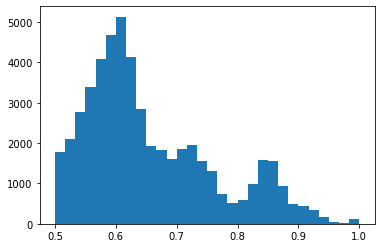

In [42]:
confidence = []
for r in rules:
    confidence.append(r[4])

plt.hist(confidence, bins= 30)

(array([4.0000e+00, 6.2000e+01, 5.9800e+02, 9.4690e+03, 2.8904e+04,
        9.4620e+03, 8.8000e+02, 3.4600e+02, 2.9500e+02, 4.6300e+02,
        4.0600e+02, 1.1000e+02, 1.2000e+01, 1.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 1.8000e+01, 7.2000e+01, 2.5900e+02,
        8.9000e+01, 2.4000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.62255623, 0.7085781 , 0.79459996, 0.88062183, 0.9666437 ,
        1.05266556, 1.13868743, 1.22470929, 1.31073116, 1.39675302,
        1.48277489, 1.56879675, 1.65481862, 1.74084048, 1.82686235,
        1.91288421, 1.99890608, 2.08492795, 2.17094981, 2.25697168,
        2.34299354, 2.42901541, 2.51503727, 2.60105914, 2.687081  ,
        2.77310287, 2.85912473, 2.9451466 , 3.03116846, 3.11719033,
        3.2032122 ]),
 <BarContainer object of 30 artists>)

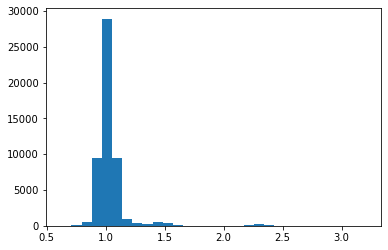

In [43]:
lift = []
for r in rules:
        lift.append(r[5])

plt.hist(lift, bins= 30)

In [44]:
dfmiss = df.stack().sample(frac=0.99).unstack()

In [45]:
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobLevel,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,...,Income_bin,Distance_bin,PercentSalaryHike_bin,RelSatisfaction,Edu,EnvSatisfaction,JobInv,NCompWorked,YearsInCurrRole,StockLevel
0,No,Travel_Rarely,Research & Development,Medical,Male,JobLevel: 3,JobSat:High,Single,OverTime:No,PRat:Excellent,...,"[5756.5, 10504.0)_USD","[8.0, 15.0)_km","[14.5, 18.0)_%",RelSat:High,Edu:Master,EnvSat:Medium,JobInv:High,Companies:9,RoleYears:7,StockOpt:0
1,No,Travel_Rarely,Research & Development,Life Sciences,Male,JobLevel: 5,JobSat:High,Divorced,OverTime:Yes,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:Below College,EnvSat:Medium,JobInv:High,Companies:1,RoleYears:8,StockOpt:1
2,No,Travel_Frequently,Sales,Life Sciences,Male,JobLevel: 2,JobSat:VeryHigh,Divorced,OverTime:Yes,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[15.0, 22.0)_km","[21.5, 25.014)_%",RelSat:High,Edu:Bachelor,EnvSat:High,JobInv:High,Companies:1,RoleYears:5,StockOpt:1
3,No,Travel_Rarely,Research & Development,Technical Degree,Male,JobLevel: 1,JobSat:Medium,Single,OverTime:No,PRat:Excellent,...,"[1009.0, 5756.5)_USD","[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:Medium,Edu:Master,EnvSat:Medium,JobInv:High,Companies:2,RoleYears:7,StockOpt:0
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,JobLevel: 1,JobSat:VeryHigh,Single,OverTime:No,PRat:Excellent,...,"[5756.5, 10504.0)_USD","[8.0, 15.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:College,EnvSat:High,JobInv:High,Companies:1,RoleYears:2,StockOpt:0


In [46]:
df['nan_attr']='NaN'

In [47]:
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobLevel,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,...,Distance_bin,PercentSalaryHike_bin,RelSatisfaction,Edu,EnvSatisfaction,JobInv,NCompWorked,YearsInCurrRole,StockLevel,nan_attr
0,No,Travel_Rarely,Research & Development,Medical,Male,JobLevel: 3,JobSat:High,Single,OverTime:No,PRat:Excellent,...,"[8.0, 15.0)_km","[14.5, 18.0)_%",RelSat:High,Edu:Master,EnvSat:Medium,JobInv:High,Companies:9,RoleYears:7,StockOpt:0,NaN
1,No,Travel_Rarely,Research & Development,Life Sciences,Male,JobLevel: 5,JobSat:High,Divorced,OverTime:Yes,PRat:Excellent,...,"[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:Below College,EnvSat:Medium,JobInv:High,Companies:1,RoleYears:8,StockOpt:1,NaN
2,No,Travel_Frequently,Sales,Life Sciences,Male,JobLevel: 2,JobSat:VeryHigh,Divorced,OverTime:Yes,PRat:Excellent,...,"[15.0, 22.0)_km","[21.5, 25.014)_%",RelSat:High,Edu:Bachelor,EnvSat:High,JobInv:High,Companies:1,RoleYears:5,StockOpt:1,NaN
3,No,Travel_Rarely,Research & Development,Technical Degree,Male,JobLevel: 1,JobSat:Medium,Single,OverTime:No,PRat:Excellent,...,"[1.0, 8.0)_km","[11.0, 14.5)_%",RelSat:Medium,Edu:Master,EnvSat:Medium,JobInv:High,Companies:2,RoleYears:7,StockOpt:0,NaN
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,JobLevel: 1,JobSat:VeryHigh,Single,OverTime:No,PRat:Excellent,...,"[8.0, 15.0)_km","[11.0, 14.5)_%",RelSat:High,Edu:College,EnvSat:High,JobInv:High,Companies:1,RoleYears:2,StockOpt:0,NaN


In [48]:
df["nan_attr"].value_counts()

df['nan_attr']= df.loc[(df['OverTime']=='OverTime:Yes')] = "Attr:yes"
df.nan_attr.value_counts()

Attr:yes    1435
Name: nan_attr, dtype: int64